<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/CNN_Learnable_Parameters_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20DS708 – Deep Learning for Visual Recognition M.Tech (Data Science-(2020-2022)) (2020-21(Even))**


**Internal Assessment/Quiz -2**

***THEIVAPRAKASHAM H - CB.EN.P2CEN20026***

**1. Write the expression to compute the output size of the convolution layer with an color image as an input (height and the width of the color image are same), kernel size as ‘f x f’ and the number of kernels used is ‘N’.                                            (2 marks)**

**Solution**

Assuming the question as Valid Padding,

Input Image size = height X width X no of channels =  h X w X c

Kernal size = f X f
Number of kernals = N


**Output size =  (h - f + 1) X (w - f + 1) X N**





--------------------

**2. Compute the number  of learnable parameters in each layer of the given architecture.**
Input Color Image: 256 x 256.

First Convolution Layer: Kernel size: (3 x 3), No.of Kernels: 64, size=’same’. Stride=1.

Max pooling layer: Kernel size: 2 x 2 (Non-Overlapping).

Second Convolution Layer: Kernel size: (3 x 3), No.of Kernels: 128, Stride=1.

(4 marks)


-----------------------

**Solution:**

Input Colour Image = 256 x 256 x 3

First Conv Layer = 3x3x64

**Number of learnable parameters =  Number of filters in previous layer X Number of filters in Current Convolutional Layer X Width of the filter in Current Convolutional Layer X Height of the filter in Current Convolutional Layer**

Number of learnable parameters after first conv layer = 3 x 64 x 3 x 3 = 1728

Max pooling has no learning parameters

Second Conv Layer = 3 x 3 x 128

Number of learnable parameters aftersecond conv layer = 64 x 128 x 3 x 3 = 73,728


**Total Parameters = 75,456**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [ ]:
# Validating using keras tensorflow framework

model = tf.keras.models.Sequential([ 
Conv2D(filters=64, kernel_size=(3,3), input_shape = (256,256,3), padding='same', strides=(1,1), use_bias=False),
MaxPool2D(pool_size=(2, 2), strides=2, padding='valid',),
Conv2D(filters=128, kernel_size=(3,3), use_bias=False)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 64)      1728      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 126, 128)     73728     
Total params: 75,456
Trainable params: 75,456
Non-trainable params: 0
_________________________________________________________________


**3.Write the matlab code to read the given input color image: “Lena.png” (Hint: imread is the  function  name),  convert  to  grayscale  (Hint:  Grey= 0.3*Redplane + 0.6*Greenplane + 0.1*Blueplane) and use the below given filter to compute the convolution feature map of the given image. (You can use the built-in convolution function available) Note: If you are comfortable in implementing this in python, you can opt for it).** 

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = Image.open("/content/lena.jpg")

In [ ]:
# applying greyscale method
image = ImageOps.grayscale(img)

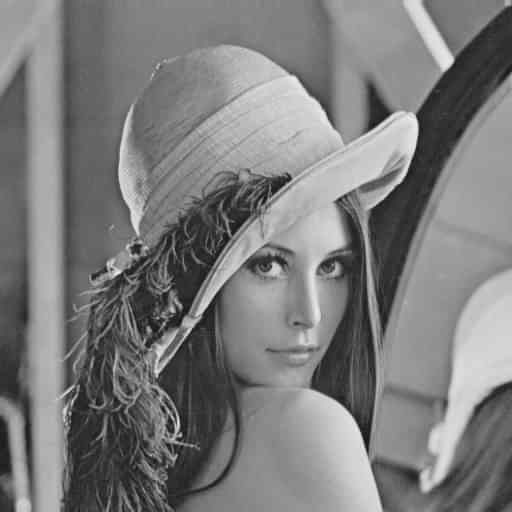

In [ ]:
image

In [ ]:
#Defining 2D Convolution function with valid padding

def conv2d(input, kernel):
  H,W = input.shape
  M,N = kernel.shape
  out = np.zeros((H-M+1,W-N+1),  dtype=float)
  kernel = np.flip(kernel)
  for i in range(H-M+1):
    for j in range(W-N+1):
      out[i,j] =  np.sum( input[i:i+M,j:j+N] * kernel)  #Performing Convolution
  return out

The Shape of Filter:  (3, 3)


Text(0.5, 1.0, '3x3 Convolutional Filter')

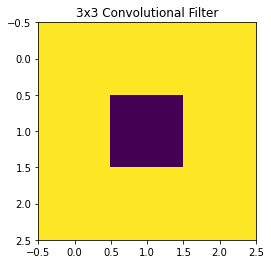

In [ ]:
#Creating 3x3 Convolutional Filter

filter = np.array([[1,1,1],[1,-9, 1],[1, 1, 1]])
print("The Shape of Filter: ", filter.shape)
plt.imshow(filter)
plt.title("3x3 Convolutional Filter")

The Shape of Output:  (510, 510)


Text(0.5, 1.0, 'Output Image after applying 2D Convolutional Filter')

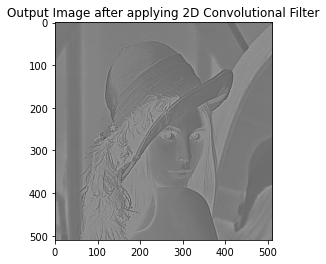

In [ ]:
#Performing Convolution
output = conv2d(np.array(image),filter)

print("The Shape of Output: ", output.shape)
plt.imshow(output, cmap='gray')
plt.title("Output Image after applying 2D Convolutional Filter")

-----------------------------

**4. Define ReLu activation functions. Plot the function in Matlab/Python.**


----------------------------

**Solution:**

**Relu (Rectified Linear Unit)**


The rectified linear activation function or ReLU is an activation function that will output the input directly if it is positive, otherwise, it will output zero. 

Relu is widely used in deep learning beaucse of its low computational cost and mitigating vanishing gradient problem.

$Relu$ $f(x)=\max(0, x)$

In [ ]:
def relu(x):
    return np.maximum(0, x)

Input Vales:  [-50.         -47.95918367 -45.91836735 -43.87755102 -41.83673469
 -39.79591837 -37.75510204 -35.71428571 -33.67346939 -31.63265306
 -29.59183673 -27.55102041 -25.51020408 -23.46938776 -21.42857143
 -19.3877551  -17.34693878 -15.30612245 -13.26530612 -11.2244898
  -9.18367347  -7.14285714  -5.10204082  -3.06122449  -1.02040816
   1.02040816   3.06122449   5.10204082   7.14285714   9.18367347
  11.2244898   13.26530612  15.30612245  17.34693878  19.3877551
  21.42857143  23.46938776  25.51020408  27.55102041  29.59183673
  31.63265306  33.67346939  35.71428571  37.75510204  39.79591837
  41.83673469  43.87755102  45.91836735  47.95918367  50.        ]
Output Values after Relu:  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.02040816  3.06122449  5.

Text(0.5, 1.0, 'Relu Function')

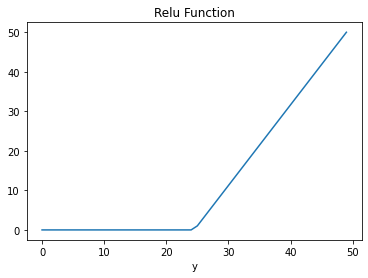

In [ ]:
input = np.linspace(-50,50,50)
print("Input Vales: ", input)

output = relu(input)
print("Output Values after Relu: ", output) 
plt.plot(output)
plt.xlabel("x")
plt.xlabel("y")
plt.title("Relu Function")


**5. Compute the softmax output for the given vector [0.058   2.36    1.32].**

In [ ]:
def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum

In [ ]:
input = np.array([0.058, 2.36, 1.32])

In [ ]:
output = softmax(input)
print("Softmax Output: ", output)

Softmax Output:  [0.06883909 0.68798824 0.24317267]
